In [ ]:
#QUESTION 7 MODEL LAB IVP

In [1]:
import cv2

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
image_path = r"Test-slanted.jpg"
original_image = Image.open(image_path)

original_array = np.array(original_image)

In [6]:
def add_uniform_noise(image, intensity):
    noise = np.random.uniform(low=-intensity, high=intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

uniform_noise_intensity = 100
noisy_uniform_img = add_uniform_noise(image, uniform_noise_intensity)

In [9]:
gaussian_noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_gaussian_img = cv2.add(image, gaussian_noise)

In [10]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    # Add salt noise
    salt_mask = np.random.rand(*image.shape[:2]) < salt_prob
    noisy_image[salt_mask] = [255, 255, 255]
    # Add pepper noise
    pepper_mask = np.random.rand(*image.shape[:2]) < pepper_prob
    noisy_image[pepper_mask] = [0, 0, 0]
    return noisy_image

salt_and_pepper_prob = 0.15
noisy_salt_and_pepper_img = add_salt_and_pepper_noise(image, 0.15, 0.15)

(<Axes: title={'center': 'Salt and Pepper Noise'}>,
 Text(0.5, 1.0, 'Salt and Pepper Noise'))

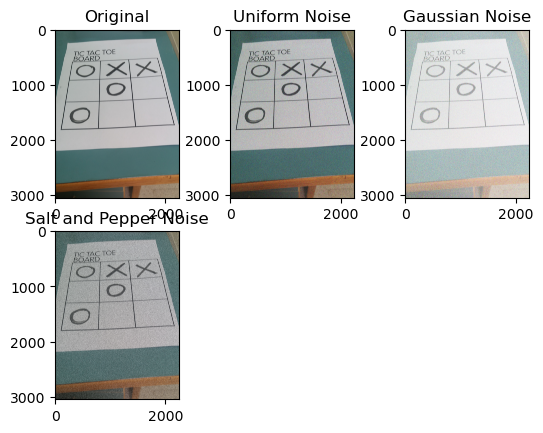

In [14]:
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(noisy_uniform_img, cv2.COLOR_BGR2RGB)), plt.title('Uniform Noise')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(noisy_gaussian_img, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Noise')
plt.subplot(2, 3, 4), plt.imshow(cv2.cvtColor(noisy_salt_and_pepper_img, cv2.COLOR_BGR2RGB)), plt.title('Salt and Pepper Noise')

In [16]:
#smoothing filter
blurred_img = cv2.GaussianBlur(noisy_uniform_img, (5, 5), 0)

median_blurred_img = cv2.medianBlur(noisy_salt_and_pepper_img, 5)

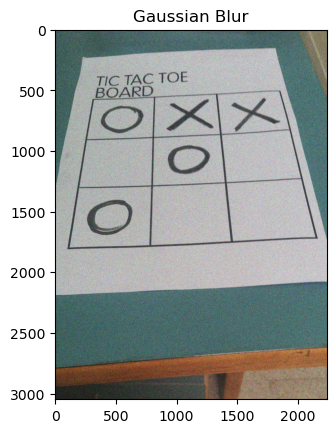

In [23]:
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)), plt.title('Gaussian Blur')

plt.show()

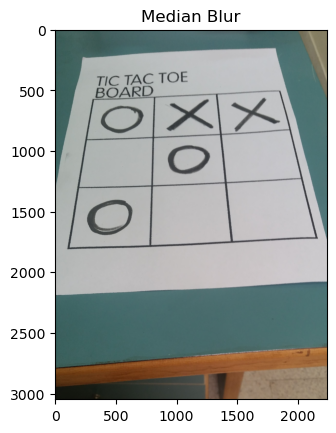

In [22]:
plt.imshow(cv2.cvtColor(median_blurred_img, cv2.COLOR_BGR2RGB)), plt.title('Median Blur')
plt.show()